In [38]:
import warnings
warnings.filterwarnings("ignore")


# Insurance dataset

In [39]:
import pandas as pd
#from google.colab import drive


#drive.mount('/content/drive')


data = pd.read_csv(r'C:\Users\vessy\OneDrive\Desktop\Sweden\Thesis\IBM Watson\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
data.head()

#https://www.kaggle.com/datasets/pankajjsh06/ibm-watson-marketing-customer-value-data?resource=download

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# Models

## Random Forest on the whole dataset

In [112]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Define the parameter grid
param_grid = {
 'n_estimators': [100, 200, 300, 400, 500, 600],  # Number of trees in the forest   
 'min_samples_split': [5, 6, 7, 8, 9, 10, 15],   # Minimum number of samples required to split a node
 'min_samples_leaf': [5, 6, 7, 8, 9, 10, 15],      # Minimum number of samples required at each leaf node
 'max_features': ['None', 'sqrt', 'log2'],
}

# Create a Random Forest classifier or regressor
# Replace RandomForestClassifier with RandomForestRegressor for regression tasks
rf_regressor = RandomForestRegressor(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',  n_jobs=-1)

# cv=5
# n_jobs=-1

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print("Best model:", grid_search.best_estimator_)


# auto is the same as sqrt
# In case of auto: considers max_features = sqrt(n_features)
# In case of sqrt: considers max_features = sqrt(n_features), it is same as auto
# In case of None: considers max_features = n_features

# https://www.geeksforgeeks.org/hyperparameters-of-random-forest-classifier/

Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 300}
Best score: -0.4117300760157795
Best model: RandomForestRegressor(max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=5, n_estimators=300, random_state=42)


We have extracted the most optimal parameters for our RF model. The best score metric is the negative mean squared error - it can be interpreted as 0.36. It is a low score for the mean squared error and a very good result.

In [113]:
# with parameter tuning

best_model_rf = grid_search.best_estimator_

rf_model = best_model_rf.fit(X_train, y_train)

y_pred_test = rf_model.predict(X_test)

# Calculate R-squared score on the test data
test_r2_score1 = r2_score(y_test, y_pred_test)

test_rmse1 = mean_squared_error(y_test, y_pred_test, squared=False)
print("Test RMSE (tuned):", test_rmse1)

# Print the mean R-squared score and test R-squared score
print("Test R-squared score (tuned):", test_r2_score1)

Test RMSE (tuned): 0.6934519902402186
Test R-squared score (tuned): 0.5595373197181128


In [114]:
# without parameter tuning
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rf_regressor = RandomForestRegressor(random_state = 42)

rf_model = rf_regressor.fit(X_train, y_train)

y_pred_test = rf_model.predict(X_test)

# Calculate R-squared score on the test data
test_r2_score = r2_score(y_test, y_pred_test)

test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print("Test RMSE:", test_rmse)

# Print the mean R-squared score and test R-squared score
print("Test R-squared score:", test_r2_score)


Test RMSE: 0.584875657973932
Test R-squared score: 0.6866689652866365


In [94]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-validation Neg RMSE scores:", scores)

# Calculate and print mean score
print("Mean Neg RMSE score:", scores.mean())

Cross-validation Neg RMSE scores: [0.73599504 0.71877148 0.68428557 0.72518453 0.69282123]
Mean Neg RMSE score: 0.7114115716426307


In [86]:
from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Print cross-validation scores
print("Cross-validation Neg RMSE scores:", scores1)

# Calculate and print mean score
print("Mean Neg RMSE score:", scores1.mean())

Cross-validation Neg RMSE scores: [-0.53661308 -0.54346875 -0.53592661 -0.48282778 -0.54984881]
Mean Neg RMSE score: -0.5297370063168426


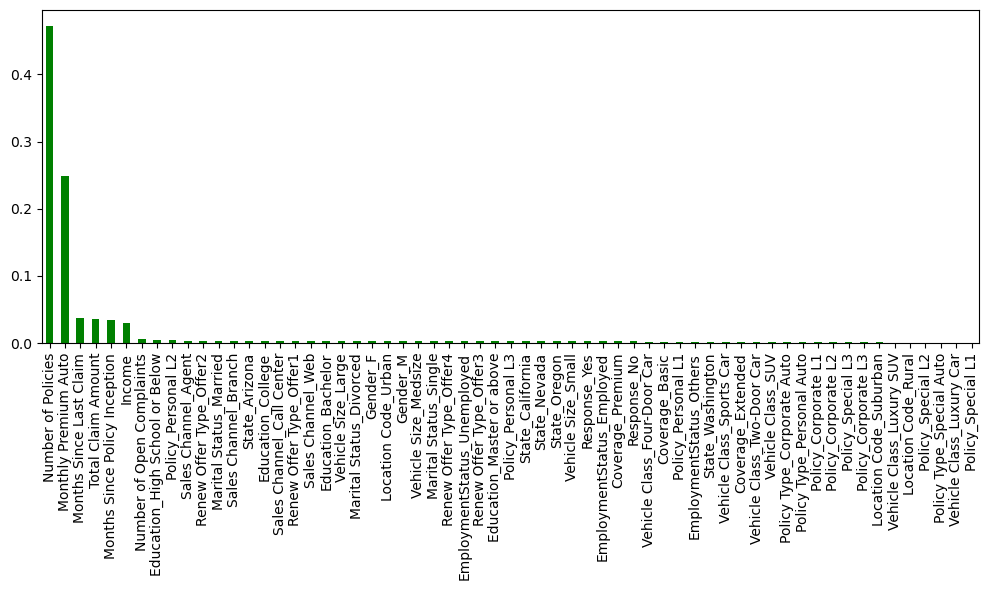

In [87]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)

importances = importances.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10,6))
importances.plot.bar(color='green', ax=ax)
fig.tight_layout()

In [88]:
importances_table = pd.DataFrame(importances, columns=['Importance'])
print(importances_table)

                               Importance
Number of Policies               0.472144
Monthly Premium Auto             0.249078
Months Since Last Claim          0.036929
Total Claim Amount               0.036448
Months Since Policy Inception    0.033995
...                                   ...
Location Code_Rural              0.000846
Policy_Special L2                0.000842
Policy Type_Special Auto         0.000767
Vehicle Class_Luxury Car         0.000696
Policy_Special L1                0.000234

[61 rows x 1 columns]


## Random Forest for each cluster

In [89]:
cluster_assignments = kmeans.labels_
# Initialize lists to store RMSE values and number of data points for each cluster
rmse_values = []
r2_values = []

n_data_points_per_cluster = []

# Initialize a dictionary to store RMSE per cluster
rmse_per_cluster = {}
r2_per_cluster = {}


# Iterate over each unique cluster label
for cluster_id in np.unique(cluster_assignments):
    # Filter data for the current cluster
    X_cluster = X_train[cluster_assignments == cluster_id]
    y_cluster = y_train[cluster_assignments == cluster_id]
    
    # Split data into training and testing sets
    X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(
        X_cluster, y_cluster, test_size=0.2, random_state=42)
    
    # Define and train the random forest regression model
    #rf_regressor_best = RandomForestRegressor(random_state = 42)
    #rf_model = rf_regressor_best.fit(X_train_cluster, y_train_cluster)
    
    # Make predictions
    y_pred_cluster = rf_model.predict(X_test_cluster)
    
    # Calculate RMSE for the current cluster
    rmse_cluster = mean_squared_error(y_test_cluster, y_pred_cluster, squared=False)
    
    # Calculate R^2 for the current cluster
    r2_cluster = r2_score(y_test_cluster, y_pred_cluster)
    
    # Append RMSE and number of data points for the current cluster
    rmse_values.append(rmse_cluster)
    n_data_points_per_cluster.append(len(y_test_cluster))
    
    r2_values.append(r2_cluster)

    
    # Store RMSE for the current cluster
    rmse_per_cluster[f'Cluster {cluster_id}'] = rmse_cluster
    r2_per_cluster[f'Cluster {cluster_id}'] = r2_cluster

# Calculate weighted average of RMSE values
overall_rmse = np.average(rmse_values, weights=n_data_points_per_cluster)
overall_r2 = np.mean(r2_values)

# Display RMSEs per cluster
print("RMSEs per cluster:")
for cluster, rmse in rmse_per_cluster.items():
    print(f"{cluster}: {rmse}")
    
print("\nR^2 per cluster:")
for cluster, r2 in r2_per_cluster.items():
    print(f"{cluster}: {r2}")

# Display overall RMSE
print("Overall RMSE:", overall_rmse)
print("Overall R^2:", overall_r2)


RMSEs per cluster:
Cluster 0: 0.16739062421973078
Cluster 1: 0.18961713034561642
Cluster 2: 0.33540160199366165

R^2 per cluster:
Cluster 0: 0.957082254787867
Cluster 1: 0.952068183844522
Cluster 2: 0.9562892193738481
Overall RMSE: 0.1981254347067245
Overall R^2: 0.9551465526687458


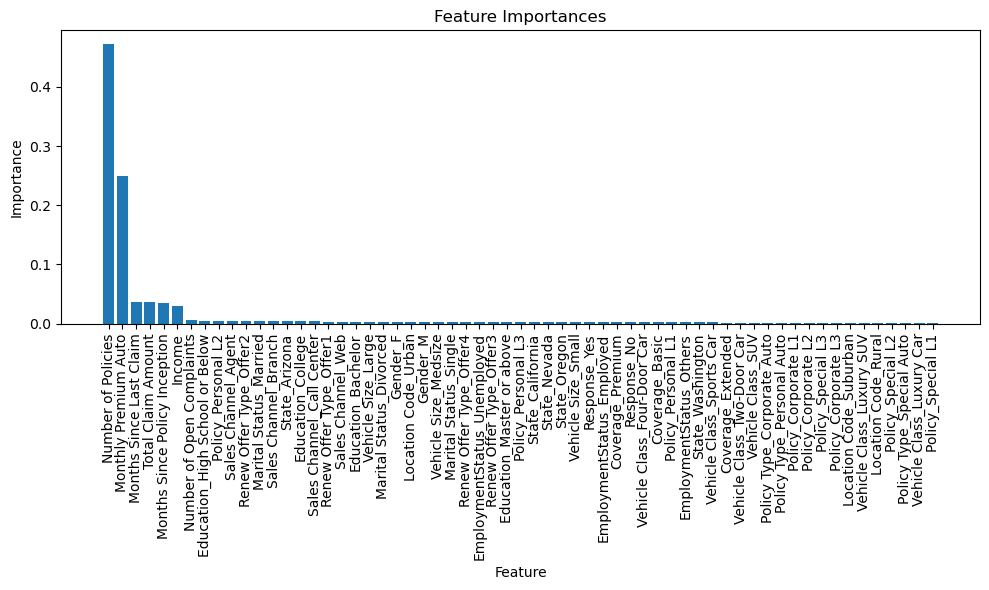

In [90]:
# Get feature importances
importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Based on the experiments above, we can see that the $R^2$ and the RMSE give much better results when the model is first applied separately to each cluster.

# XG Boost on the whole data


In [57]:
#pip install xgboost


In [115]:
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [116]:
param_grid_xgb = {
    'n_estimators': [5000, 6000, 7000, 8000],      # Number of trees in the forest
    'max_depth': [3, 6, 9],                # Maximum depth of the trees, default is usually 6
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'gamma':[0, 0.1, 0.2],
    'reg_lambda': [1e-6, 1e-4, 0.001, 0.01, 0.1, 1, 10, 100]
}
#https://xgboost.readthedocs.io/en/latest/parameter.html

In [117]:
xgb_regressor = XGBRegressor(random_state = 42)

# Create GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid_xgb, cv=5, scoring='neg_root_mean_squared_error', n_jobs = -1)

# Perform grid search
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search_xgb.best_params_)
print("Best score:", grid_search_xgb.best_score_)
print("Best model:", grid_search_xgb.best_estimator_)

Best parameters: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 8000, 'reg_lambda': 1e-06}
Best score: -0.5326819780127469
Best model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=8000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [118]:
best_model_xgb = grid_search_xgb.best_estimator_
#xgb_model = best_model_xgb.fit(X_train, y_train)

#best_params_xgb = grid_search.best_params_
#grid_search_xgb.fit(X_train, y_train)

#xgb_regressor = XGBRegressor(random_state = 42)

xgb_model = best_model_xgb.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f"RMSE for all data: {rmse}")

r2_all_data = r2_score(y_test, y_pred_xgb)

# Print the R2 score
print(f"R2 Score for all data: {r2_all_data}")

RMSE for all data: 0.5903566184431839
R2 Score for all data: 0.6807689016010251


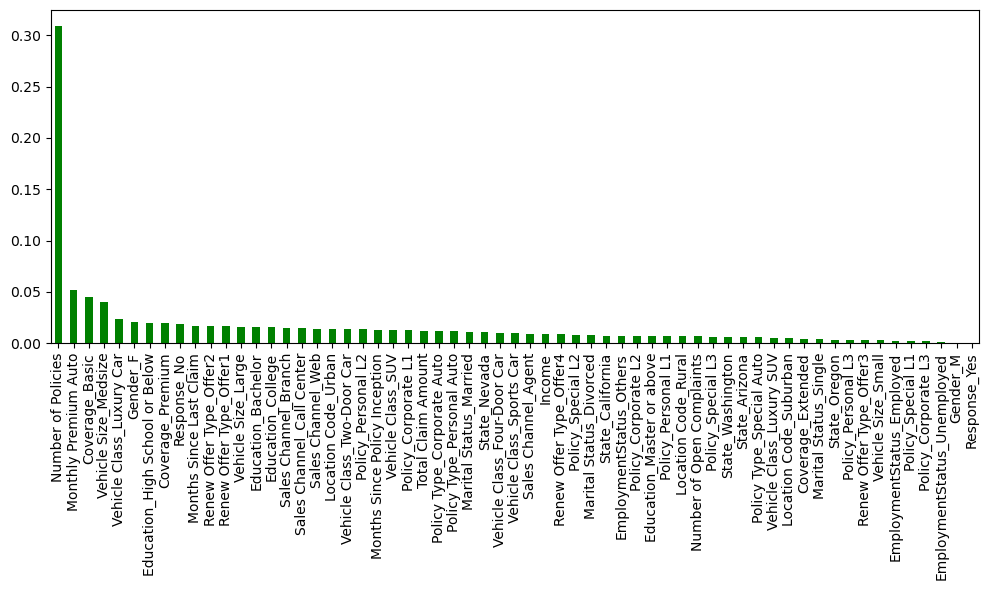

In [119]:
importances1 = pd.Series(xgb_model.feature_importances_, index=X.columns)

importances1 = importances1.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
importances1.plot.bar(color='green', ax=ax)
fig.tight_layout()

In [123]:
importances_table1 = pd.DataFrame(importances1, columns=['Importance'])
print(importances_table1)

                             Importance
Number of Policies             0.309191
Monthly Premium Auto           0.051426
Coverage_Basic                 0.045420
Vehicle Size_Medsize           0.040438
Vehicle Class_Luxury Car       0.023452
...                                 ...
Policy_Special L1              0.002128
Policy_Corporate L3            0.002120
EmploymentStatus_Unemployed    0.000899
Gender_M                       0.000000
Response_Yes                   0.000000

[61 rows x 1 columns]


## XGBoost for each cluster

In [126]:
from sklearn.metrics import r2_score

# Initialize dictionaries to store RMSE and R2 per cluster
rmse_per_cluster = {}
r2_per_cluster = {}

# Initialize lists to store RMSE values, R2 values, and number of data points for each cluster
rmse_values = []
r2_values = []
n_data_points_per_cluster = []

# Iterate over each unique cluster label
for cluster_id in np.unique(cluster_assignments):
    # Filter data for the current cluster
    X_cluster = X_train[cluster_assignments == cluster_id]
    y_cluster = y_train[cluster_assignments == cluster_id]
    
    X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Make predictions
    y_pred_cluster = best_model_xgb.predict(X_test_cluster)
    
    # Calculate RMSE for the current cluster
    rmse_cluster = mean_squared_error(y_test_cluster, y_pred_cluster, squared=False)
    rmse_per_cluster[f'Cluster {cluster_id}'] = rmse_cluster
    
    # Calculate R2 for the current cluster
    r2_cluster = r2_score(y_test_cluster, y_pred_cluster)
    r2_per_cluster[f'Cluster {cluster_id}'] = r2_cluster
    
    # Append RMSE, R2, and number of data points for the current cluster
    rmse_values.append(rmse_cluster)
    r2_values.append(r2_cluster)
    n_data_points_per_cluster.append(len(y_test_cluster))

# Calculate weighted average of RMSE and R2 values
overall_rmse = np.average(rmse_values, weights=n_data_points_per_cluster)
overall_r2 = np.average(r2_values, weights=n_data_points_per_cluster)

# Display RMSEs per cluster
print("RMSEs per cluster:")
for cluster, rmse in rmse_per_cluster.items():
    print(f"{cluster}: {rmse}")

# Display R2s per cluster
print("\nR2s per cluster:")
for cluster, r2 in r2_per_cluster.items():
    print(f"{cluster}: {r2}")

# Display overall RMSE and R2
print("\nOverall RMSE:", overall_rmse)
print("Overall R2:", overall_r2)


RMSEs per cluster:
Cluster 0: 0.38515403522642916
Cluster 1: 0.39247733253574263
Cluster 2: 0.45696857344684016

R2s per cluster:
Cluster 0: 0.7727815756218303
Cluster 1: 0.7946484884825052
Cluster 2: 0.918860754471207

Overall RMSE: 0.39719304063431926
Overall R2: 0.8007865257896856


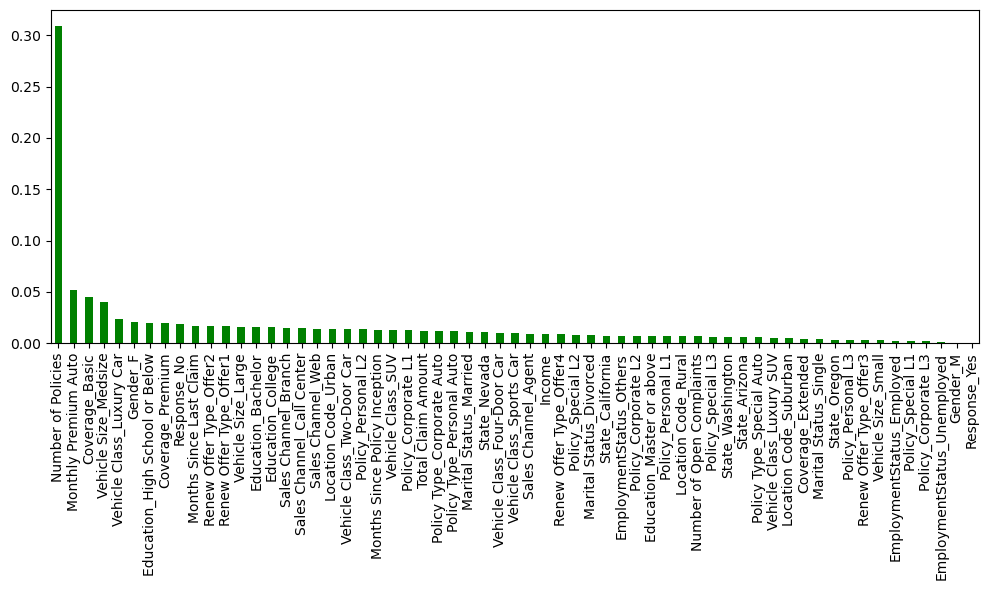

In [125]:
importances = pd.Series(best_model_xgb.feature_importances_, index=X.columns)

importances = importances.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
importances.plot.bar(color='green', ax=ax)
fig.tight_layout()

Similarly to Random Forest, we can see that the $R^2$ and the RMSE are much better when applying the model to each cluster rather than on the whole data.

## Neural Networks - should we keep this method too or focus only on RF and XGBoost?

In [103]:
# best architecture so far
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers


model_1 = Sequential([
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])

model_1.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', tf.keras.metrics.RootMeanSquaredError()])

In [104]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history1 = model_1.fit(X, y, epochs=100, validation_split=0.2, callbacks = [early_stopping])

# Display the summary of the model
model_1.summary()

Epoch 1/100
229/229 [==============================] - 2s 3ms/step - loss: 0.9310 - mae: 0.6119 - root_mean_squared_error: 0.9649 - val_loss: 0.8283 - val_mae: 0.5648 - val_root_mean_squared_error: 0.9101
Epoch 2/100
229/229 [==============================] - 0s 2ms/step - loss: 0.8643 - mae: 0.5804 - root_mean_squared_error: 0.9297 - val_loss: 0.8035 - val_mae: 0.5497 - val_root_mean_squared_error: 0.8964
Epoch 3/100
229/229 [==============================] - 0s 2ms/step - loss: 0.8333 - mae: 0.5669 - root_mean_squared_error: 0.9129 - val_loss: 0.7984 - val_mae: 0.5232 - val_root_mean_squared_error: 0.8936
Epoch 4/100
229/229 [==============================] - 0s 2ms/step - loss: 0.7976 - mae: 0.5432 - root_mean_squared_error: 0.8931 - val_loss: 0.7549 - val_mae: 0.5539 - val_root_mean_squared_error: 0.8689
Epoch 5/100
229/229 [==============================] - 0s 2ms/step - loss: 0.7400 - mae: 0.5168 - root_mean_squared_error: 0.8602 - val_loss: 0.6204 - val_mae: 0.4391 - val_root_me

In [105]:
# Evaluate the model on the test data
loss, mae, rmse = model_1.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}, Test RMSE: {rmse}")

58/58 [==============================] - 0s 1ms/step - loss: 0.2424 - mae: 0.2448 - root_mean_squared_error: 0.4923
Test Loss: 0.24237000942230225, Test MAE: 0.24478387832641602, Test RMSE: 0.49231088161468506


In [106]:
y_pred_test = model_1.predict(X_test)

r2 = r2_score(y_test, y_pred_test)
print("R2 Score:", r2)

58/58 [==============================] - 0s 991us/step
R2 Score: 0.7779988741048872


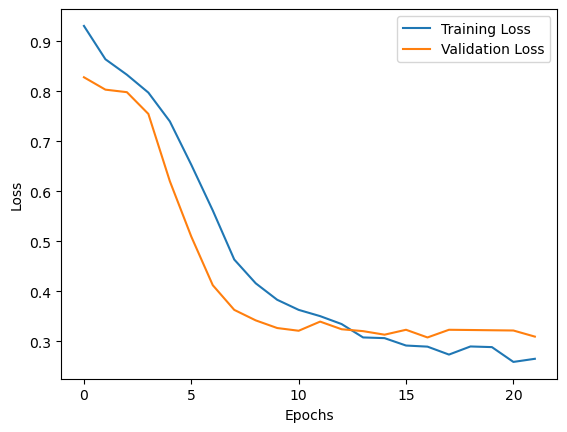

In [107]:
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Neural Network for each cluster

In [111]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_per_cluster = {}
r2_per_cluster = {}

rmse_values = []
r2_values = []
n_data_points_per_cluster = []

# Iterate over each unique cluster label
for cluster_id in np.unique(cluster_assignments):
    X_cluster = X_train[cluster_assignments == cluster_id]
    y_cluster = y_train[cluster_assignments == cluster_id]
    
    X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    model_1.fit(X_cluster, y_cluster, epochs=100, validation_split=0.2, callbacks = [early_stopping])  
    
    # Make predictions
    y_pred_cluster = model_1.predict(X_test_cluster)
    
    # Calculate RMSE for the current cluster
    rmse_cluster = mean_squared_error(y_test_cluster, y_pred_cluster, squared=False)
    rmse_per_cluster[f'Cluster {cluster_id}'] = rmse_cluster
    
    # Calculate R2 for the current cluster
    r2_cluster = r2_score(y_test_cluster, y_pred_cluster)
    r2_per_cluster[f'Cluster {cluster_id}'] = r2_cluster
    
    # Append RMSE, R2, and number of data points for the current cluster
    rmse_values.append(rmse_cluster)
    r2_values.append(r2_cluster)
    n_data_points_per_cluster.append(len(y_test_cluster))

# Calculate weighted average of RMSE and R2 values
overall_rmse = np.average(rmse_values, weights=n_data_points_per_cluster)
overall_r2 = np.average(r2_values, weights=n_data_points_per_cluster)

# Display RMSEs per cluster
print("RMSEs per cluster:")
for cluster, rmse in rmse_per_cluster.items():
    print(f"{cluster}: {rmse}")

# Display R2s per cluster
print("\nR2s per cluster:")
for cluster, r2 in r2_per_cluster.items():
    print(f"{cluster}: {r2}")

# Display overall RMSE and R2
print("\nOverall RMSE:", overall_rmse)
print("Overall R2:", overall_r2)


Epoch 1/100
70/70 [==============================] - 0s 3ms/step - loss: 0.2028 - mae: 0.2576 - root_mean_squared_error: 0.4504 - val_loss: 0.1974 - val_mae: 0.2187 - val_root_mean_squared_error: 0.4443
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 0.1842 - mae: 0.2366 - root_mean_squared_error: 0.4292 - val_loss: 0.1999 - val_mae: 0.2215 - val_root_mean_squared_error: 0.4471
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 0.1789 - mae: 0.2323 - root_mean_squared_error: 0.4230 - val_loss: 0.2010 - val_mae: 0.2238 - val_root_mean_squared_error: 0.4484
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 0.1768 - mae: 0.2244 - root_mean_squared_error: 0.4205 - val_loss: 0.2026 - val_mae: 0.2422 - val_root_mean_squared_error: 0.4502
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 0.1613 - mae: 0.2218 - root_mean_squared_error: 0.4016 - val_loss: 0.2054 - val_mae: 0.2332 - val_root_mean_squared

### Other Notes and NN experiments

Starting simple: (+ early stopping)

model_1 = Sequential([
        Dense(128, activation='relu'),
        Dense(1, activation='linear')
    ])
Test Loss: 0.4264235198497772, Test MAE: 0.3710789978504181

Same model with 64 neurons - same results

Adding dropout:

model_1 = Sequential([
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='linear')
    ])

model_1.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', tf.keras.metrics.RootMeanSquaredError()])
- Test Loss: 0.5224011540412903, Test MAE: 0.3752201795578003, Test RMSE: 0.7227732539176941

Improvement with this model:
model_1 = Sequential([
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
- Test Loss: 0.38021156191825867, Test MAE: 0.2819163501262665, Test RMSE: 0.61661297082901

Both dropout and L2
- same performance:
model_1 = Sequential([
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])

- both L2 and dropout increase the test loss
- only L2 - aain larger test loss
